In [11]:
from Bio import SeqIO
te_fasta = "../data/benchmarking/temp_te.fasta"
tr_fasta = "../data/benchmarking/temp_tr.fasta"
# read the sequences from the fasta file
sequences = SeqIO.parse(te_fasta, "fasta")
tr_sequences = list(SeqIO.parse(tr_fasta, "fasta"))
# for each sequence, write it to a new file
for seq in sequences:
    print(seq)
    filename = f"../data/benchmarking/temp_{seq.id.replace('/', '_')}.fasta"
    with open(filename, "w+") as f:
        SeqIO.write(tr_sequences, f, "fasta")     
        SeqIO.write(seq, f, "fasta")


ID: A0A173WNX1.1/179-193
Name: A0A173WNX1.1/179-193
Description: A0A173WNX1.1/179-193 [subseq from] A0A173WNX1_9BACE IPT/TIG domain {ECO:0000313|EMBL:CUN40187.1}
Number of features: 0
Seq('EaVTPRNWVSGNVVI')
ID: A0A173WNX1.1/233-248
Name: A0A173WNX1.1/233-248
Description: A0A173WNX1.1/233-248 [subseq from] A0A173WNX1_9BACE IPT/TIG domain {ECO:0000313|EMBL:CUN40187.1}
Number of features: 0
Seq('SWKNGEwWTPADWIQN')
ID: N1JCS9.1/597-618
Name: N1JCS9.1/597-618
Description: N1JCS9.1/597-618 [subseq from] N1JCS9_BLUG1 Putative peregrin/putative PHD finger-containing protein 3 {ECO:0000313|EMBL:CCU80379.1}
Number of features: 0
Seq('CPADWIRENDVITATRDARAFY')
ID: H5WN51.1/326-341
Name: H5WN51.1/326-341
Description: H5WN51.1/326-341 [subseq from] H5WN51_9BURK Histidine kinase {ECO:0000256|ARBA:ARBA00012438}
Number of features: 0
Seq('QVLTPMGWAPGTNVMA')
ID: Q21XJ3.1/106-173
Name: Q21XJ3.1/106-173
Description: Q21XJ3.1/106-173 [subseq from] Q21XJ3_RHOFT Thiosulphate-binding protein {ECO:0000313|EMBL

In [19]:
list(sequences)

[]

In [8]:
import pandas as pd

# Define the file path
file_path = "../data/benchmarking/temp_alipid.txt"


# Load the file into a DataFrame
df = pd.read_csv(file_path, sep="\s+", usecols=[0, 1, 2], names = ["seq1","seq2","pid"],header=0)

# Print the DataFrame
print(df)

                 seq1                  seq2    pid
0    Q6FXS9.1/208-244      Q6CEJ7.1/158-193  33.33
1    Q6FXS9.1/208-244      B1N5A8.1/197-231  37.14
2    Q6FXS9.1/208-244      Q7M8C0.1/191-222  25.00
3    Q6FXS9.1/208-244      P21762.3/158-192  25.71
4    Q6FXS9.1/208-244      D6XKT6.1/191-224  35.29
..                ...                   ...    ...
115  O66779.1/178-205      O83522.1/157-179  39.13
116  O66779.1/178-205  A0A173WNX1.1/179-193  20.00
117  P0AE08.2/155-182      O83522.1/157-179  60.87
118  P0AE08.2/155-182  A0A173WNX1.1/179-193  33.33
119  O83522.1/157-179  A0A173WNX1.1/179-193  26.67

[120 rows x 3 columns]


In [13]:
seq.id = "A0A173WNX1.1/179-193"

In [16]:
# Assume seq.id is a variable holding the sequence id
seq.id = "A0A173WNX1.1/179-193"

# Subset the DataFrame
subset_df = df[(df['seq1'] == seq.id) | (df['seq2'] == seq.id)]

# Return the maximum id_percentage
max_pid = subset_df['pid'].max()

print(max_pid)

46.67


In [18]:
import glob
import os
save_path = "/n/eddy_lab/Lab/protein_annotation_dl/PSALM/data/benchmarking"
# Remove tmp files from save_path
tmp_files = glob.glob(f"{save_path}/tmp*")
for file in tmp_files:
    os.remove(file)

In [34]:
import pandas as pd
df = pd.read_csv("../data/benchmarking/log.csv",header=None, names=["subseq_id","family","pid"])
df['seq_id'] = df['subseq_id'].str.split('/').str[0]


Subset dataframe to get seq_ids that have no subseq_id with a pid greater than 25

In [35]:
grouped_df = df.groupby('seq_id')['pid'].max()
filtered_df = grouped_df[grouped_df < 25]
print(filtered_df)


seq_id
A0A010QQ35.1    19.61
A0A010RJF2.1    20.16
A0A010RQ92.1    24.44
A0A011MA56.1    23.22
A0A011Q2R1.1    17.69
                ...  
Z4WUN1.1        22.12
Z4WW19.1        24.32
Z4YIK0.1        13.58
Z9JVF0.1        23.42
Z9JWP2.1        21.70
Name: pid, Length: 66758, dtype: float64


<Axes: >

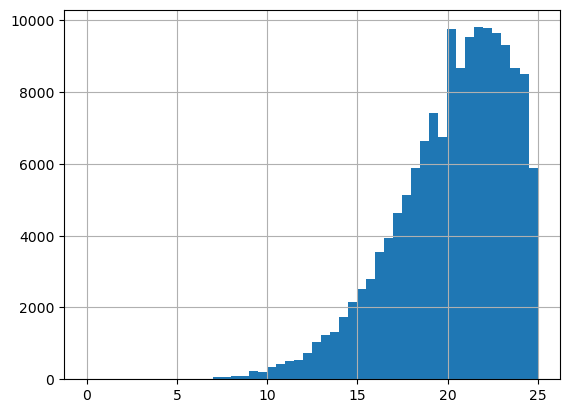

In [33]:
filtered_df.hist(bins=50)
